In [ ]:
from tkinter import *
import tkinter as tk

root = Tk()


def key(event):
    print("pressed", repr(event.char))


def callback(event):
    print("clicked at", event.x, event.y)

canvas = tk.Canvas(root, width=200, height=200)
frame = Frame(root, width=200, height=200)
frame.focus_set()
frame.bind("<Key>", key)
frame.bind("<Button-1>", callback)
frame.pack()

root.mainloop()

In [ ]:
def main():
    root = Tk()
    w = Canvas(root, width=200, height=200, background='white')
    w.pack()
    global y
    y = []

    def _paint(event):
        # event.x 鼠标左键的横坐标
        global y
        # event.y 鼠标左键的纵坐标
        x = []

        x1, y1 = (event.x - 1), (event.y - 1)

        x2, y2 = (event.x + 1), (event.y + 1)

        w.create_oval(x1, y1, x2, y2, fill='red')

        # 鼠标左键一点，就画出了一个小的椭圆

        # 画布与鼠标左键进行绑定
        y.append(y1)

    w.bind("<Button-1>",_paint)

    mainloop()



if __name__ == '__main__':
    main()

In [ ]:
import cv2
import numpy as np
img0 = cv2.imread('01.png')
area_left = 720
area_right = 1250
area_up = 300
area_bottom = 800
# avg G&B
aB = 105.9
aG = 157.4
img1 = img0
img =  img1[area_up:area_bottom, area_left:area_right,:]
# img1 =  cv2.resize(img1, (600,500),
                            #    interpolation=cv2.INTER_CUBIC)
# print(img1.shape)
# img1 = gamma(img1,1.5)
img= cv2.medianBlur(img,7)
img= cv2.medianBlur(img, 5)
# img= cv2.medianBlur(img, 5)
B,G= img[:,:,0], img[:,:,1]
B = 255-(np.abs(B-aB))
G = 255-(np.abs(G-aG))
B = B/255
G = G/255
B = np.power(B, 10)
G = np.power(G, 10)
B = B*255
G = G*255
B= cv2.blur(B, (25, 25))
G= cv2.blur(G, (25, 25))

Y =( 3*B +  G)/4

Y = np.floor(Y).round().astype(np.uint8)
Y= cv2.blur(Y, (25, 25))
# Y= cv2.blur(Y, (25, 25))

Y = Y/255
Y = np.power(Y,3)
Y = Y*255
Y = np.floor(Y).round().astype(np.uint8)
Y= cv2.blur(Y, (25, 25))
# Y= cv2.blur(Y, (25, 25))



ret,imgthresh = cv2.threshold(Y,0,255,
            cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)     #Otsu阈值处理,转化为二值图
kernel = np.ones((3,3),np.uint8)                       #定义形态变换卷积核
imgopen = cv2.morphologyEx(imgthresh,cv2.MORPH_OPEN,
            kernel,iterations=2)                       #形态变换：开运算
imgbg = cv2.dilate(imgopen,kernel,iterations=3)        #膨胀操作，确定背景
imgdist = cv2.distanceTransform(imgopen,cv2.DIST_L2,0) #距离转换，用去确定前景
ret,imgfg = cv2.threshold(imgdist,
                    0.7*imgdist.max(),255,2)           #对距离转换结果进行阈值处理
imgfg = np.uint8(imgfg)                                #转换为整数，获得前景
ret,markers = cv2.connectedComponents(imgfg)           #标记阈值处理结果
unknown = cv2.subtract(imgbg,imgfg)                    #确定位置未知区域
markers = markers + 1                                  #加1使背景不为0
markers[unknown == 255] = 0                            #将未知区域设置为0
imgwater = cv2.watershed(img,markers)                  #执行分水岭算法分割图像
img[imgwater == -1] = [0,255,0]     
cv2.imshow('1',img)
cv2.waitKey(0)  # 用于给窗口提供展示时间
cv2.destroyAllWindows()

In [ ]:
from PIL import Image, ImageTk
import tkinter as tk
import cv2
frame = cv2.imread('01.png')
root = tk.Tk()
w = tk.Canvas(root, width=800, height=800, background='white')
w.pack()
photo = ImageTk.PhotoImage(image=Image.fromarray(frame))
w.create_image(200,200, image=photo, anchor=tk.CENTER)  # 坐标代表中心位置
root.mainloop()

140 100 60
60
B通道


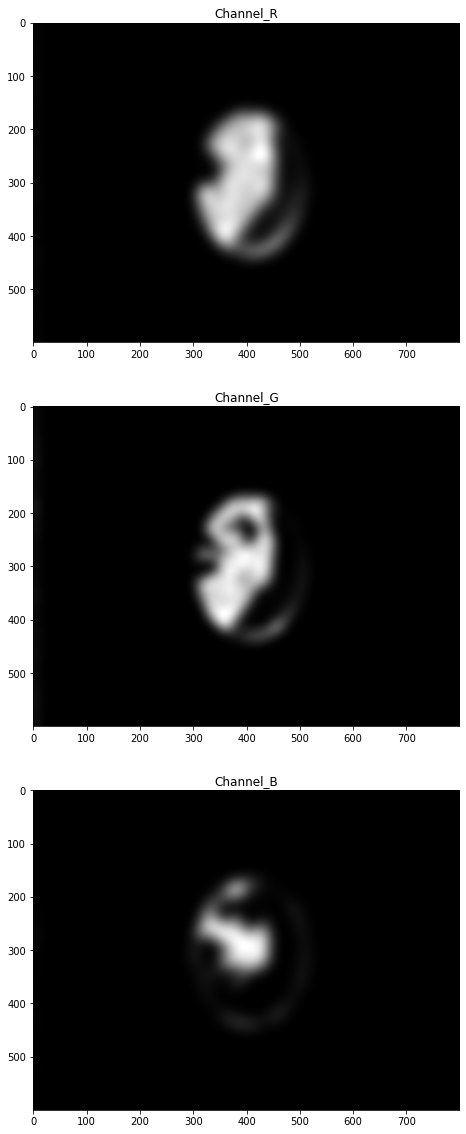

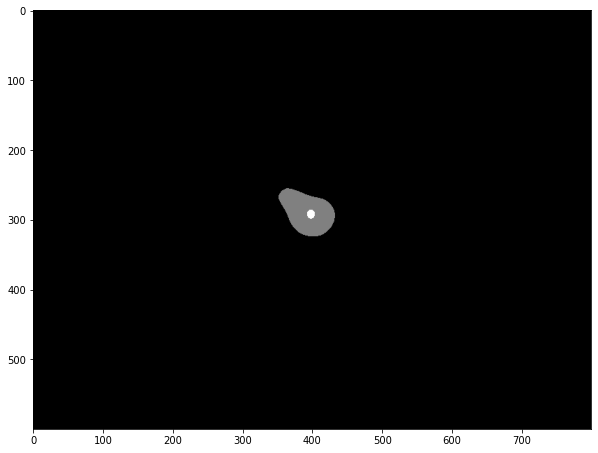

In [50]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
def plotRGB(r, g, b):
    plt.figure(figsize=(20,20))
    plt.subplot(3,1,1), plt.title('Channel_R')
    plt.imshow(r,cmap='gray')  # cmap表示用灰度显示这些图片
    plt.subplot(3,1,2), plt.title('Channel_G')
    plt.imshow(g,cmap='gray')
    plt.subplot(3,1,3), plt.title('Channel_B')
    plt.imshow(b,cmap='gray')

def hist_normalization(img, a=0, b=220):
    c = img.min()
    d = img.max()
 
    out = img.copy()
    # normalization
    out = (b - a) / (d - c) * (out - c) + a
    out[out < a] = a
    out[out > b] = b
 
    out = out.astype(np.uint8)
    return out

def gamma(img,gamma):
    b, g, r = cv2.split(img)
    b,g,r = b/255,g/255,r/255
    b = np.power(b,gamma)
    g = np.power(g,gamma)
    r = np.power(r,gamma)
    r = r * 255
    b = b * 255
    g = g * 255
    # 通道都为0-255的整型数或0-1的浮点数
    b = np.floor(b).round().astype(np.uint8)
    g = np.floor(g).round().astype(np.uint8)
    r = np.floor(r).round().astype(np.uint8)
    img = cv2.merge([b, g, r])
    return img

def frame_seg(input_img, xcoordinate, ycoordinate):
        # AREA
    # x0 = 500
    # x1 = 550
    # y0 = 300
    # y1 = 350
    # avg G&B
    aB = 60
    aG = 100
    aR = 140
    img = input_img
    img = gamma(img,1.5)
    img = hist_normalization(img)
    # cv2.imshow('1',img)
    # cv2.waitKey(0)  # 用于给窗口提供展示时间
    # cv2.destroyAllWindows()
    if len(xcoordinate)>=2:
        print("heha")
        x = xcoordinate
        y = ycoordinate
    # print(type(y))
        x0 = x[0]; x1 = x[1]
        y0 = y[0]; y1 = y[1]
    # print(type(y0))
        posx,posy,posx1,posy1 = exchange(x0,y0,x1,y1)
     # 截取图像 高度；宽度；通道

        aR = np.average(img[posy:posy1, posx:posx1, 0])
        aG = np.average(img[posy:posy1, posx:posx1, 1])
        aB = np.average(img[posy:posy1, posx:posx1, 2])
    print(aR,aG,aB)
    B, G, R = img[:, :, 2], img[:, :, 1], img[:, :, 0]
    # imgs = cv2.merge([R,G,B])
    # plt.imshow(img)
    
    # R = np.floor(R).round().astype(np.uint8)  # floor round向下取整
    # G = np.floor(G).round().astype(np.uint8)
    # B = np.floor(B).round().astype(np.uint8)
    # # 蓝色和黄色为互补色故蓝色效果最明显
    # plotRGB(R,G,B)
    B = 255-(np.abs(B-aB))
    G = 255-(np.abs(G-aG))
    R = 255-(np.abs(R-aR))
    """由各通道减去所选区域均值，结石区域变为0，255-之后结石区域会高亮显示
    """
    # plotRGB(R,G,B)
    # 对各通道进行归一化
    B = B/255
    G = G/255
    R = R/255

    # 增强暗部和亮部区域
    B = np.power(B, 30)
    G = np.power(G, 20)
    R = np.power(R, 20)
    B = B*255
    G = G*255
    R = R*255

    # B = B.round().astype(np.uint8)
    # B= cv2.medianBlur(B,15)
    B = cv2.blur(B, (25, 25))
    B = cv2.blur(B, (25, 25))
    B = cv2.blur(B, (25, 25))
    B = cv2.blur(B, (5, 5))
    B = cv2.blur(B, (5, 5))
    # B = cv2.blur(B, (5, 5))

    # G = G.round().astype(np.uint8)
    # G= cv2.medianBlur(G,15)
    G = cv2.blur(G, (25, 25))
    G = cv2.blur(G, (25, 25))
    G = cv2.blur(G, (5, 5))
    G = cv2.blur(G, (5, 5))
    G = cv2.blur(G, (5, 5))

    R= cv2.blur(R, (25, 25))
    R= cv2.blur(R, (25, 25))
    R= cv2.blur(R, (25, 25))

    # R_flatten = R.flatten()
    # for i in R_flatten:
    #     if i!=0:
    #         i +=100
    # R = R_flatten.reshape(R.shape)
    # plotRGB(R,G,B)
    # R = np.floor(R).round().astype(np.uint8)  # floor round向下取整
    # G = np.floor(G).round().astype(np.uint8)
    # B = np.floor(B).round().astype(np.uint8)
    plotRGB(R,G,B)
    print(aB)
    if aB < 70:
        Y = (5*B+G)/6   # B和G通道合成
        print("B通道")
    else:
        Y = (4*R + G)/5

    # R = np.floor(R).round().astype(np.uint8)
    # cv2.imshow('CHANNEL_R',R)
    # cv2.waitKey(0)

    Y = Y/255
    Y = np.power(Y,2.5)
    Y = Y*255
    Y = np.floor(Y).round().astype(np.uint8)
    Y = cv2.blur(Y, (25, 25))
    Y = cv2.blur(Y, (25, 25))
    Y = cv2.blur(Y, (5, 5))
    plt.figure(figsize=(10,10))
    plt.imshow(Y,cmap='gray')
    # plt.figure(figsize=(10,10))
    # plt.imshow(Y,cmap='gray')
    ret, imgthresh = cv2.threshold(Y, 0, 255,
                                   cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)  # Otsu阈值处理,转化为二值图

    kernel = np.ones((3, 3), np.uint8)  # 定义形态变换卷积核

    imgopen = cv2.morphologyEx(imgthresh, cv2.MORPH_OPEN,
                               kernel, iterations=7)  # 形态变换：开运算

    imgbg = cv2.dilate(imgopen, kernel, iterations=5)  # 膨胀操作，确定背景
    imgbg = cv2.erode(imgbg,kernel,iterations = 3)

    imgdist = cv2.distanceTransform(imgopen, cv2.DIST_L2, 0)  # 距离转换，用去确定前景

    ret, imgfg = cv2.threshold(imgdist,
                               0.7*imgdist.max(), 255, 2)  # 对距离转换结果进行阈值处理

    imgfg = np.uint8(imgfg)  # 转换为整数，获得前景

    ret, markers = cv2.connectedComponents(imgfg)  # 标记阈值处理结果

    unknown = cv2.subtract(imgbg, imgfg)  # 确定位置未知区域

    markers = markers + 1  # 加1使背景不为0
    markers[unknown == 255] = 0  # 将未知区域设置为0
    imgwater = cv2.watershed(img, markers)  # 执行分水岭算法分割图像
    img[imgwater == -1] = [0, 255, 0]  # 将原图中被标记点设置为绿色

    return img

def exchange(ax, ay, ax1, ay1):
    x = ax; y = ay; x1 = ax1; y1 = ay1
    # print(type(y))
    # print(type(y1))
    if x > x1:
        x,x1 = x1,x
    if y > y1:
        y,y1 = y1,y
    return x,y,x1,y1

flag = 0
posx, posy, posx1, posy1 = 0,0,0,0

def on_mouse(event, x, y, flags, param):
    
    global flag,posx, posy, posx1, posy1
    if event == cv2.EVENT_LBUTTONDOWN:  # 鼠标左键按下
        if flag == 1:
            posx1 = x
            posy1 = y
            # if flag == 1:  # 获取点击的第二点
            #     cv2.destroyAllWindows() # 关闭当前窗口
        elif flag == 0:
            posx = x
            posy = y
            # 获取鼠标点击的第一点
            flag += 1
        # print(flag)
        print(posx,posy)
        print(posx1,posy1)

img = cv2.imread('01.png')

img = cv2.resize(img, (800,600),
                        interpolation=cv2.INTER_CUBIC)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = frame_seg(img,[],[])#,[366,430],[279,321])
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
cv2.imshow('1',img)
cv2.setMouseCallback("1", on_mouse, 0)
cv2.waitKey(0)  # 用于给窗口提供展示时间
cv2.destroyAllWindows()